In [131]:
#https://www.kaggle.com/code/vincentlugat/titanic-neural-networks-keras-81-8
#https://www.kaggle.com/code/stefanbergstein/keras-deep-learning-on-titanic-data
#https://medium.com/@mukundsharma1995/working-with-titanic-dataset-using-keras-solving-a-simple-classification-problem-440e3860e8fd
#video:
#https://www.youtube.com/watch?v=IAzuLSa-sb0&list=PL99M1tNzXULPlLT5ppsoznoxXLefI3xBf&index=11&t=3274s


'''
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
'''

'\nsurvival\tSurvival\t0 = No, 1 = Yes\npclass\tTicket class\t1 = 1st, 2 = 2nd, 3 = 3rd\nsex\tSex\t\nAge\tAge in years\t\nsibsp\t# of siblings / spouses aboard the Titanic\t\nparch\t# of parents / children aboard the Titanic\t\nticket\tTicket number\t\nfare\tPassenger fare\t\ncabin\tCabin number\t\nembarked\tPort of Embarkation\tC = Cherbourg, Q = Queenstown, S = Southampton\n'

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
#read into DataFrame
df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [134]:
############################
############################
#DISPLAY
############################
############################

In [135]:
#enable to see all columns in a notebook
pd.set_option('display.max_columns', None)

#enable to see all rows in a notebook
pd.set_option('display.max_rows', None)

In [136]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [138]:
##################
#RUN STATS - HOW MANY NaN
##################
train_nan=df_train.isnull().sum().sort_values(ascending = False)[0:20]
test_nan=df_test.isnull().sum().sort_values(ascending = False)[0:20]




x = pd.DataFrame(train_nan, columns=['train'])
x['test']=test_nan

# Using Dataframe.apply() and lambda function
x["train [%]"] = x["train"].apply(lambda x: round((x/df_train.shape[0])*100))

print(x)

print("Number of rows-train:", df_train.shape[0])
print("Number of rows-test:", df_test.shape[0])

             train   test  train [%]
Cabin          687  327.0         77
Age            177   86.0         20
Embarked         2    0.0          0
PassengerId      0    0.0          0
Survived         0    NaN          0
Pclass           0    0.0          0
Name             0    0.0          0
Sex              0    0.0          0
SibSp            0    0.0          0
Parch            0    0.0          0
Ticket           0    0.0          0
Fare             0    1.0          0
Number of rows-train: 891
Number of rows-test: 418


In [139]:
########################
#Dropping values depending on percentage of NaN
########################

#dropping columns with certain percentage of NaN
perc = 75 #percentage of NaN


min_count =  int(((100-perc)/100)*df_train.shape[0] + 1)
df_train = df_train.dropna( axis=1, thresh=min_count)


min_count =  int(((100-perc)/100)*df_test.shape[0] + 1)
df_test = df_test.dropna( axis=1, thresh=min_count)


In [140]:
##################
#RUN STATS - HOW MANY NaN
##################
train_nan=df_train.isnull().sum().sort_values(ascending = False)[0:20]
test_nan=df_test.isnull().sum().sort_values(ascending = False)[0:20]

x = pd.DataFrame(train_nan, columns=['train'])
x['test']=test_nan

# Using Dataframe.apply() and lambda function
x["train [%]"] = x["train"].apply(lambda x: round((x/df_train.shape[0])*100))

print(x)

print("Number of rows-train:", df_train.shape[0])
print("Number of rows-test:", df_test.shape[0])

             train  test  train [%]
Age            177  86.0         20
Embarked         2   0.0          0
PassengerId      0   0.0          0
Survived         0   NaN          0
Pclass           0   0.0          0
Name             0   0.0          0
Sex              0   0.0          0
SibSp            0   0.0          0
Parch            0   0.0          0
Ticket           0   0.0          0
Fare             0   1.0          0
Number of rows-train: 891
Number of rows-test: 418


In [141]:
#####################
#Fill in with mean
#####################

#function that selects nonstring only colums without string and fill in NaN colums with mean value

def fillin_mean(data_frame):

    #selecting all columns without String
    string_check=data_frame.select_dtypes(exclude=['object'])

    #checking if columns without string have NaN
    nan_check=string_check.isnull().sum().sort_values(ascending = False)[0:20]

    #converting Index an Value in the list
    list_index=nan_check.index.values.tolist()
    list_value=nan_check.values.tolist()

    #creating array from 2 lists
    new_array=np.column_stack((list_index,list_value))

    #creating unique list by expecting the array
    unique_list=[]
    for x in range(len(new_array)):
        if new_array[x,1] != '0':
            unique_list.append(new_array[x,0])

    #fill in the N/A with the mean
    if unique_list !=[]:
        data_frame[unique_list]=data_frame[unique_list].fillna(data_frame[unique_list].median()) #mean()
        data_frame.head()
        print("In following columns were NaN changed to mean: ",unique_list)
    else:
        print("All columns without string DON'T contain NaN.")

#call the function
fillin_mean(df_train)
fillin_mean(df_test)


In following columns were NaN changed to mean:  ['Age']
In following columns were NaN changed to mean:  ['Age', 'Fare']


In [142]:
##################
#RUN STATS - HOW MANY NaN
##################
train_nan=df_train.isnull().sum().sort_values(ascending = False)[0:20]
test_nan=df_test.isnull().sum().sort_values(ascending = False)[0:20]

#Creating DataFrame x
x = pd.DataFrame(train_nan, columns=['train'])
x['test']=test_nan #adding column to dataframe

# Using Dataframe.apply() and lambda function
x["train [%]"] = x["train"].apply(lambda x: round((x/df_train.shape[0])*100))

print(x)

print("Number of rows-train:", df_train.shape[0])
print("Number of rows-test:", df_test.shape[0])


             train  test  train [%]
Embarked         2   0.0          0
PassengerId      0   0.0          0
Survived         0   NaN          0
Pclass           0   0.0          0
Name             0   0.0          0
Sex              0   0.0          0
Age              0   0.0          0
SibSp            0   0.0          0
Parch            0   0.0          0
Ticket           0   0.0          0
Fare             0   0.0          0
Number of rows-train: 891
Number of rows-test: 418


In [143]:
############################
############################
#FEATURE ENGINEERING
############################
############################

In [144]:
#categorical values
categ_columns = df_train.select_dtypes(exclude=[np.number])
categ_columns.describe()

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


In [145]:
#get a closer look at categorical
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [146]:
####################
#BINS
####################

In [147]:
#bin - AGE

df_train['Age_bin'] = pd.cut(df_train['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
df_test['Age_bin'] = pd.cut(df_test['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [148]:
#bin - FARE

#get a list
def split_data(data_frame, column_name):
    #load: min, 25%, 50%=mean, 75%=median, max
    stat=data_frame[column_name].describe()

    #import data into list
    stat_list=stat.values.tolist()

    #slice first 3
    stat_list=stat_list[3:]
    return stat_list

train_list=split_data(df_train,'Fare')
test_list=split_data(df_test,'Fare')

# import list into bin and create new columns
df_train['Fare_bin'] = pd.cut(df_train['Fare'], bins=train_list, labels=['0÷25%_fare','25÷50%_fare','50÷75%_fare','75÷100%_fare'])
df_test['Fare_bin'] = pd.cut(df_test['Fare'], bins=test_list, labels=['0÷25%_fare','25÷50%_fare','50÷75%_fare','75÷100%_fare'])


In [149]:
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bin,Fare_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Adult,0÷25%_fare


In [150]:
####################
#DUMMIES
####################

In [151]:
#change categorical-dummies
df_train = pd.get_dummies(df_train, columns = ["Sex","Embarked",'Age_bin','Fare_bin'], prefix=["gender","Em",'Age_type', 'Ticket'])
df_test = pd.get_dummies(df_test, columns = ["Sex","Embarked",'Age_bin','Fare_bin'], prefix=["gender","Em",'Age_type', 'Ticket'])

In [152]:
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,gender_female,gender_male,Em_C,Em_Q,Em_S,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Ticket_0÷25%_fare,Ticket_25÷50%_fare,Ticket_50÷75%_fare,Ticket_75÷100%_fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,False,True,False,False,True,False,False,True,False,True,False,False,False


In [153]:
#FINAL replacing string by NaN
for col in df_train.columns:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

for col in df_test.columns:
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')
    
#fill in the NaN with the mean in all columns
df_train=df_train.fillna(df_train.mean())
df_test=df_test.fillna(df_test.mean())


#delete all columns containing NAN - in case of colums full of string become NaN-impossible to do a mean from string
df_train=df_train.dropna(axis=1, how='all')
df_test=df_test.dropna(axis=1, how='all')


In [154]:
#######################
#FINAL CHECK
#######################

In [155]:
##################
#RUN STATS - HOW MANY NaN
##################
train_nan=df_train.isnull().sum().sort_values(ascending = False)[0:20]
test_nan=df_test.isnull().sum().sort_values(ascending = False)[0:20]

x = pd.DataFrame(train_nan, columns=['train'])
x['test']=test_nan

#Using Dataframe.apply() and lambda function
x["train [%]"] = x["train"].apply(lambda x: round((x/df_train.shape[0])*100))

print(x)

print("Number of rows-train:", df_train.shape[0])
print("Number of rows-test:", df_test.shape[0])

                    train  test  train [%]
PassengerId             0   0.0          0
Em_Q                    0   0.0          0
Ticket_50÷75%_fare      0   0.0          0
Ticket_25÷50%_fare      0   0.0          0
Ticket_0÷25%_fare       0   0.0          0
Age_type_Elder          0   0.0          0
Age_type_Adult          0   0.0          0
Age_type_Teenage        0   0.0          0
Age_type_Children       0   0.0          0
Em_S                    0   0.0          0
Em_C                    0   0.0          0
Survived                0   NaN          0
gender_male             0   0.0          0
gender_female           0   0.0          0
Fare                    0   0.0          0
Ticket                  0   0.0          0
Parch                   0   0.0          0
SibSp                   0   0.0          0
Age                     0   0.0          0
Pclass                  0   0.0          0
Number of rows-train: 891
Number of rows-test: 418


In [156]:
############################
############################
#PROCESSING
############################
############################

In [157]:
#dropping ID and other columns
df_train=df_train.drop(['PassengerId', 'Ticket'], axis=1)

df_test=df_test.drop(['PassengerId','Ticket'], axis=1)

In [158]:
#defining input=X and output=y for models
input=df_train.drop(['Survived'], axis=1)
output=df_train[['Survived']]

#independant
X=input

#dependant
y=output

In [159]:
######################
#Scaling data
######################

In [160]:
#convert dataframe into numpy - due to cross valiadation
X_np=X.values
y_np=y.values

#for test data
X_test_np=df_test.values

In [161]:
#scale data
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_np_scaled=scaler.fit_transform(X_np)
y_np_scaled=scaler.fit_transform(y_np)

#for test data
X_test_np_scaled=scaler.fit_transform(X_test_np)

In [162]:
######################
#Splitting data
######################

In [163]:
#scale and split data
from sklearn.model_selection import train_test_split

scale=True

if scale==False:
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
     print('Data NOT scaled!')

elif scale==True:
    X_train, X_test, y_train, y_test = train_test_split(X_np_scaled, y_np_scaled, test_size=0.25, random_state=42)
    print('Data scaled!')

Data scaled!


In [164]:
###############
#Neural Networks
###############

In [165]:
#Import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K

In [166]:
#define NN function
def make_net(number_features=X.shape[1],# number of columns/features in training data
            hidden_layers=2,
            hidden_layer_neurons=40,
            dropout=0.0
            ):

    #clear previous TensorFlow:
    K.clear_session()

    #define model
    mod=Sequential()

    #add input layer
    mod.add(Dense(hidden_layer_neurons, input_dim=number_features, activation='relu')) 

    #add hidden layers
    for i in range(hidden_layers):   
        mod.add(Dense(hidden_layer_neurons, activation='relu'))

        #add dropout layer
        mod.add(Dropout(dropout))

    #add final layer
    mod.add(Dense(1, activation='sigmoid')) #I have to chose 1, because it is binary classification

    # Compile model
    mod.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return mod



In [167]:
#define ploting function
def plot_training(history_dict):
    acc_values=history_dict['accuracy']
    val_acc_values=history_dict['val_accuracy']
    epochs=range(1,len(acc_values)+1)

    plt.plot(epochs,acc_values, label='Training accuracy',  c="blue")
    plt.plot(epochs,val_acc_values, label='Test accuracy', c="red")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [168]:
#define scoring function
def print_accuracy(m):
    pred_train= m.predict(X_train)
    score_train = m.evaluate(X_train, y_train, verbose=0)
    print(f'Accuracy on training data: {round(score_train[1]*100,2)} %')   

    #score on test data
    pred_test= m.predict(X_test)
    score_test = m.evaluate(X_test, y_test, verbose=0)
    print(f'Accuracy on test data: {round(score_test[1]*100,2)} %')    

    #diference(train-test)
    delta=(score_train[1]-score_test[1])
    print(f'Diference(train-test): {round(delta*100,2)} %')   


In [169]:
##############################
#Fit and run 
##############################

In [170]:
#define model
model=make_net(number_features=X.shape[1],# number of columns/features in training data
            hidden_layers=10,
            hidden_layer_neurons=200,
            dropout=0.0
            )

In [171]:
#stop iterations at the best=before it starts overfitting
from keras import callbacks 

early_stopping=callbacks.EarlyStopping(patience=20)

#fit model
#store data from computing in history
hist=model.fit(X_train, y_train, 
                validation_data=(X_test, y_test),
                epochs=100, 
                batch_size = 64,
                callbacks=[early_stopping]
                )

Epoch 1/100


11/11 [==============================] - 2s 24ms/step - loss: 0.6282 - accuracy: 0.5868 - val_loss: 0.5368 - val_accuracy: 0.6009
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.5316 - accuracy: 0.7455 - val_loss: 0.5322 - val_accuracy: 0.7534
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.5005 - accuracy: 0.8069 - val_loss: 0.4880 - val_accuracy: 0.7534
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.4516 - accuracy: 0.8099 - val_loss: 0.4973 - val_accuracy: 0.7623
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.4174 - accuracy: 0.8263 - val_loss: 0.4747 - val_accuracy: 0.7623
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.4077 - accuracy: 0.8278 - val_loss: 0.4446 - val_accuracy: 0.8072
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.3810 - accuracy: 0.8413 - val_loss: 0.4789 - val_accuracy: 0.7892
Epoch 8/100
11/11 [=====

In [172]:
print_accuracy(model)

21/21 [==============================] - 0s 2ms/step
Accuracy on training data: 86.68 %
7/7 [==============================] - 0s 2ms/step
Accuracy on test data: 78.03 %
Diference(train-test): 8.65 %


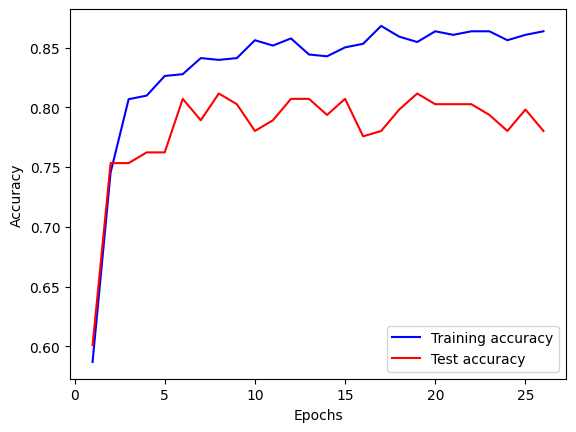

In [173]:
plot_training(hist.history)

In [174]:
############
#OPTUNA-I-CREATE FUNCTION WITH MODEL
############

#https://www.youtube.com/watch?v=JYqdKT4lQjo
#https://www.avisi.nl/blog/deep-learning-neural-networks-optimaliseren-met-optuna

In [175]:
#import libraries
import optuna
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from optuna.integration import TFKerasPruningCallback
from optuna.pruners import HyperbandPruner

#Creating the function which will be optimized by Optuna
def create_model(trial):
    
    number_features=X.shape[1]

    #define the ranges
    hidden_layers = trial.suggest_int('hidden_layers',1, 6, 1) #range only first 2 numbers, third one is a step
    hidden_layer_neurons = trial.suggest_int('hidden_layer_neurons',20, 60, 10) #range only first 2 numbers, third one is a step
    dropout = trial.suggest_int('dropout',0 , 0) #range

    #clear previous TensorFlow
    K.clear_session()
    
    #define model
    mod=Sequential()

    #add input layer
    mod.add(Dense(hidden_layer_neurons, input_dim=number_features, activation='relu')) 

    #add hidden layers
    for i in range(hidden_layers):   
        mod.add(Dense(hidden_layer_neurons, activation='relu'))

        #add dropout layer
        mod.add(Dropout(dropout))

    #add final layer
    mod.add(Dense(1, activation='sigmoid')) #I have to chose 1, because it is binary classification

    #Compile model
    mod.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return mod

In [176]:
############
#OPTUNA-II-FIT AND PRUNE
############

In [177]:
def objective(trial):
    K.clear_session()
    model = create_model(trial)

    #reduce learning rate if metric stopped improving: https://keras.io/api/callbacks/reduce_lr_on_plateau/
    reduce_lr_callback = ReduceLROnPlateau(
                                            monitor="val_accuracy", 
                                            factor=0.2, #lr * factor=new_lr
                                            patience=5, #patience number of epochs, after no umprovement LR is reduced
                                            min_lr=0.001 
                                            )
    callbacks = [
                TFKerasPruningCallback(trial, "val_accuracy"),
                reduce_lr_callback,
                EarlyStopping(patience=10)
                ]
     
    hist_opt = model.fit(
                    X_train,
                    y_train, 
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks= callbacks #call the whole list 'callbacks'
                    )
     
    return hist_opt.history["val_accuracy"][-1]

In [178]:
############
#OPTUNA-III-RUN
############

In [179]:
#Silent the interations
optuna.logging.set_verbosity(optuna.logging.WARNING) 

#Run optimization
study = optuna.create_study(
                            direction = 'maximize',
                            pruner=HyperbandPruner(),
                            load_if_exists=True, #handle a conflict of study names. In the case where a study named 'study_name' already exists
                            )

study.optimize(func=objective, n_trials=10)


Epoch 1/100
11/11 [==============================] - 1s 15ms/step - loss: 0.6813 - accuracy: 0.6138 - val_loss: 0.6658 - val_accuracy: 0.6323 - lr: 0.0010
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.6422 - val_loss: 0.6332 - val_accuracy: 0.6457 - lr: 0.0010
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6108 - accuracy: 0.6632 - val_loss: 0.5911 - val_accuracy: 0.7040 - lr: 0.0010
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5657 - accuracy: 0.7305 - val_loss: 0.5442 - val_accuracy: 0.7623 - lr: 0.0010
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5258 - accuracy: 0.7650 - val_loss: 0.5079 - val_accuracy: 0.7803 - lr: 0.0010
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.4953 - accuracy: 0.7829 - val_loss: 0.4841 - val_accuracy: 0.7758 - lr: 0.0010
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.

In [180]:
############
#OPTUNA-IV-RESULTS AND CHARTS
############

In [181]:
#Show the best score and parameters
print(f'The best test score is: {round(study.best_trial.value*100,2)} %')
print('The best parameters are:', study.best_params)

The best test score is: 81.61 %
The best parameters are: {'hidden_layers': 1, 'hidden_layer_neurons': 60, 'dropout': 0}


In [182]:
#Objective value x Trials
optuna.visualization.plot_optimization_history(study)


In [183]:
#Pruning history
optuna.visualization.plot_intermediate_values(study)

In [184]:
############################
############################
#Run with the best params
############################
############################

In [185]:
#define model
model=make_net(number_features=X.shape[1],# number of columns/features in training data
            hidden_layers=2,
            hidden_layer_neurons=20,
            dropout=0.0
            )

In [186]:
#stop iterations at the best=before it starts overfitting
from keras import callbacks 

early_stopping=callbacks.EarlyStopping(patience=20)

#fit model
#store data from computing in history
hist=model.fit(X_train, y_train, 
                validation_data=(X_test, y_test),
                epochs=100, 
                batch_size = 64,
                callbacks=[early_stopping],
                verbose=0
                )

In [187]:
print_accuracy(model)

21/21 [==============================] - 0s 2ms/step
Accuracy on training data: 84.88 %
7/7 [==============================] - 0s 2ms/step
Accuracy on test data: 78.48 %
Diference(train-test): 6.4 %


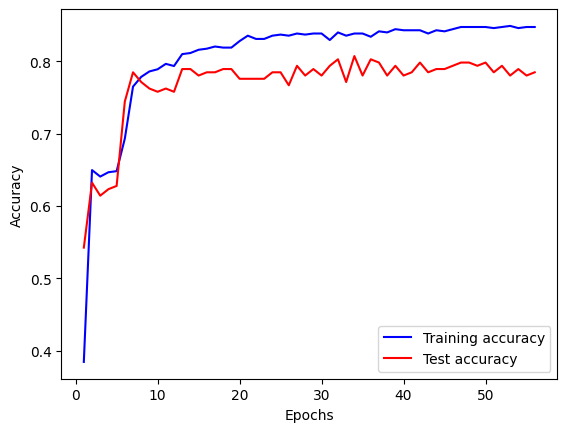

In [188]:
plot_training(hist.history)

In [189]:
############################
############################
#POST-PROCESSING - KAGGLE
############################
############################

In [190]:
#scale and split data
X_real_test_Id= pd.read_csv('test.csv', usecols=["PassengerId"])

if scale==False:
     X_real_test = df_test
     print('Used NOT scaled data!')

elif scale==True:
    X_real_test = X_test_np_scaled
    print('Used scaled data!!')

Used scaled data!!


In [191]:
#fit the data on training data with the best parameters from the hyperparametr tunning

m=model

#predict data from the test data
test_pred = m.predict(X_real_test)

#craeate dataframe for submission
df_newsub = X_real_test_Id.copy()
df_newsub['Survived'] = [1 if x >= 0.5 else 0 for x in test_pred]



14/14 [==============================] - 0s 2ms/step


In [192]:
#write data to sumbmission csv
df_newsub.to_csv("TIT-03.csv", index = False)

In [193]:
############################
############################
#Export model using JOBLIP
############################
############################

In [194]:
# Save model
import joblib

joblib.dump(model, filename='NN-scaled-4lay-30neu.pkl')

['NN-scaled-4lay-30neu.pkl']